In [1]:
import sqlite3 as lite
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import unicodedata
import re
# import pickle
import time
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib as plt

In [3]:
# Retrieve Mentions Data as DataFrame
db_name = "SEC_Filings.db"
table_name = "Mentions_Data"

engine = sqlalchemy.create_engine('sqlite:///' + db_name, execution_options={"sqlite_raw_colnames": True})
df = pd.read_sql_table(table_name, engine)

In [5]:
# Word Search List
word_search_list_2 = ['ai', 'deep learning', 'deep-learning', 'computer vision', 'computer-vision', 'bots', 'automation', 'machine learning', 'machine-learning', 'algorithm', 'artificial intelligence', 'artificial-intelligence']

# Slice DataFrame by Industry (SIC)
df_wc = df[word_search_list_2].set_index(df['SIC'])
df_wc
    
sum_bank = df_wc.loc[['6022', '6029', '6035', '6036', '6099']].sum()
sum_air = df_wc.loc[['4513', '4522', '4581']].sum()                             # 4512 = Air Transportation, Scheduled DOES NOT HAVE ANY ENTRIES
sum_fin = df_wc.loc[['6172', '6199', '6200', '6211', '6221', '6282']].sum()         # 6163 = Investment Advice DOES NOT HAVE ANY ENTRIES
sum_agri = df_wc.loc[['0100', '0200', '0900']].sum()            # 0700 = Agricultural Production-Crops DOES NOT HAVE ANY ENTRIES # 0800 = Agricultural Production-Livestock & Animal Specialties DOES NOT HAVE ANY ENTRIES

# Sum Total Word Count by Industry (SIC)
bank_mentions = sum_bank.sum()
air_mentions = sum_air.sum()
fin_mentions = sum_fin.sum()
agri_mentions = sum_agri.sum()

# Create New DataFrame to Store the 'Industry' Word Counts
df_industry = pd.DataFrame({'Industry': ['Banking', 'Air Travel', 'Financial Services', 'Agriculture, Forestry etc.'], 'Mentions': [bank_mentions, air_mentions, fin_mentions, agri_mentions]})
df_industry

,Industry,Mentions
0,Banking,355
1,Air Travel,97
2,Financial Services,2544
3,"Agriculture, Forestry etc.",263


<AxesSubplot: title={'center': 'Mentions of Keywords in 10-Ks by Industry (SIC)'}, xlabel='Industry'>

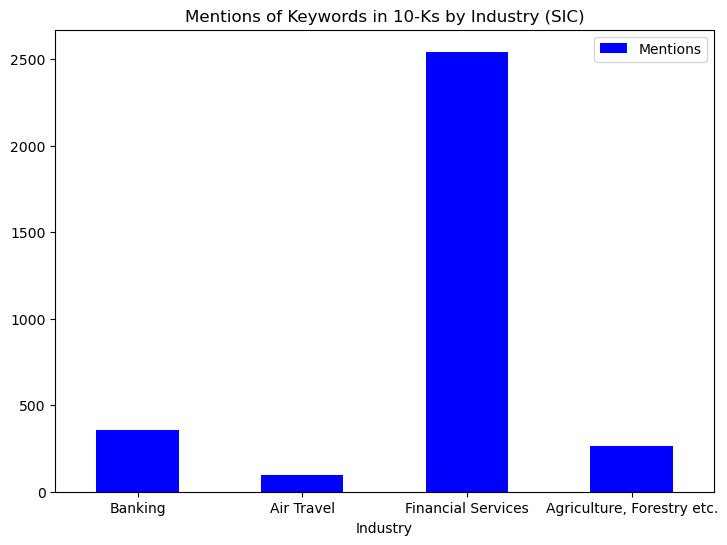

In [6]:
# Plot the Word Count by Industry (SIC)
df_industry.plot.bar(x='Industry', y='Mentions', rot=0, color='blue', figsize=(8.5, 6), title='Mentions of Keywords in 10-Ks by Industry (SIC)')

In [21]:
# Isolate Word Count Data by Industry
df_fin_co = df.loc[df['SIC'].isin(['6172', '6199', '6200', '6211', '6221', '6282'])]

df_air_co = df.loc[df['SIC'].isin(['4513', '4522', '4581'])]

df_bank_co = df.loc[df['SIC'].isin(['6022', '6029', '6035', '6036', '6099'])]

df_agri_co = df.loc[df['SIC'].isin(['0100', '0200', '0900'])]

# Isolate Word Count by CIK and Company Name
df_fin_co_cik = df_fin_co.groupby(['Company']).sum()

# Sum Across rows to get Total Word Count by Company
df_fin_co_cik['Total'] = df_fin_co_cik.sum(axis=1)
df_fin_co_cik

# Isolate Top 5 Companies by Word Count
df_fin_co_cik_top5 = df_fin_co_cik.nlargest(5, 'Total')
df_fin_co_cik_top5

,ai,deep learning,deep-learning,computer vision,computer-vision,bots,automation,machine learning,machine-learning,algorithm,artificial intelligence,artificial-intelligence,Total
Company,,,,,,,,,,,,,
"Upstart Holdings, Inc.",491,0,0,0,0,0,45,51,0,0,37,0,624
Blackstone Inc.,129,0,0,0,0,0,0,0,0,0,9,0,138
OppFi Inc.,55,0,0,0,0,0,15,55,0,2,11,0,138
Cosmos Group Holdings Inc.,111,0,0,0,0,0,0,0,0,0,13,0,124
"Riot Platforms, Inc.",1,0,0,0,0,0,3,0,0,63,1,0,68


<AxesSubplot: title={'center': 'Mentions of Keywords in 10-Ks by Top 5 Financial Services Companies'}, xlabel='Company'>

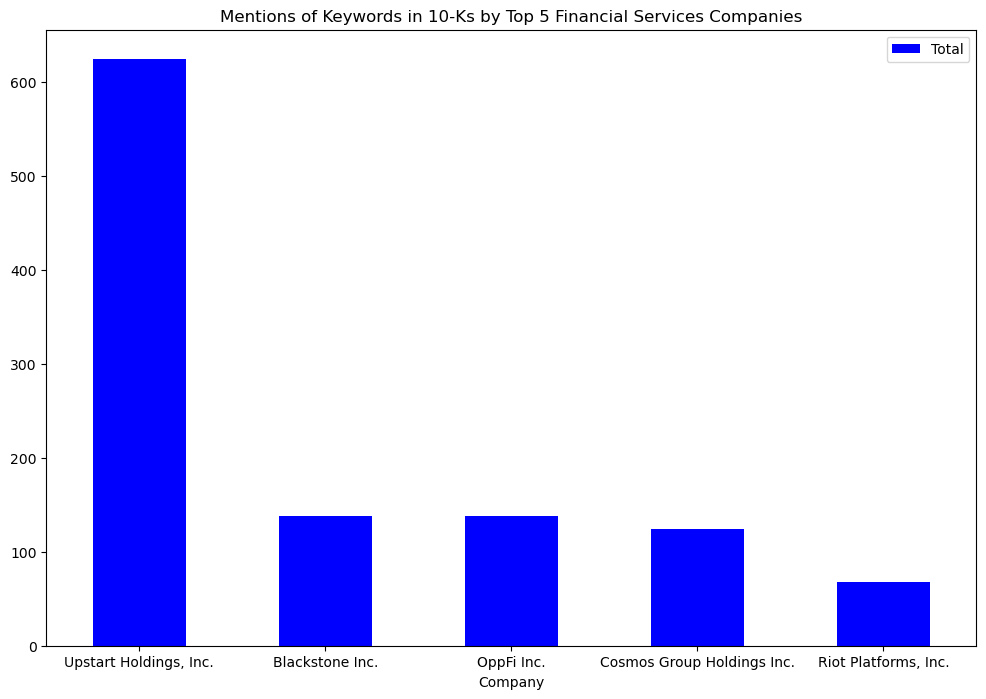

In [24]:
# Plot Bar Chart of Top 5 Companies by Word Count
df_fin_co_cik_top5.plot.bar(y='Total', rot=0, color='blue', figsize=(12, 8), title='Mentions of Keywords in 10-Ks by Top 5 Financial Services Companies')